<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp25/blob/main/Exercises/04_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On #4

**Chapter 7 – Ensemble Learning and Random Forests**

File name convention: For group 42 and memebers Richard Stallman and Linus <br>
Torvalds it would be
"04_Random_Forests_Stallman_Torvalds.pdf".

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br> possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended <br> for you to try to understand every line of code.   <br>
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [1]:
import sys
import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**You don't need to understand the next 3 code blocks**

Let's create some functions we'll need for the following tasks. `plot_digit` <br>
plots a 28x28 image as if it were a heatmap. `plot_decision_boundary` plots <br>
a decision boundary as we saw last week. `plot_predictions` plots predictions <br>
made by one regressor or the sum of multiple regressors on a single plot.

In [2]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [3]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5],
                           alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [4]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-",
                     data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

### Task 1

**Task 1a)**   
As we did in the [last assignment](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/03_Decision_Trees.ipynb), load the [moon dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) with 500 <br>
samples, 0.3 for the noise value, and `random_state` to `42` . Also, perform <br> train_test_split on it. Use the default split value of 25% test.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [6]:
X, y = make_moons(n_samples=500,noise=0.3,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

Now, we are going to build a voting classifier with the following estimators:   
- logistic regression (`solver="lbfgs", random_state=42`)
- random forest classifier (`n_estimators=100, random_state=42`)
- svc (`gamma="scale", random_state=42`)
    
**Task 1b)**   
Initialize those three objects with the given parameters.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [8]:
log_clf = LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma='scale',random_state=42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

In [9]:
from sklearn.ensemble import VotingClassifier

In [10]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

**Task 1c)**  
Explain `voting='hard"` in the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html). What is soft voting?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 1c) answer:


*Hard voting* is when the final voting classifier picks the class according to the majority vote of the classifiers. In contrast, *soft voting* is when the final voting classifier averages the predictions (out of predict_proba) of the classifiers and chooses the higher one to make the classification.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

**Task 1d)**  
Finally, fit the voting classifier to your train dataset.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [11]:
# fit here
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

### Task 2

Now we are going to print out the accuracy scores for each of the classifier <br>
above.

Complete the code below as indicated in the comments.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [12]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    # predict the y_test with each classifier
    y_pred = clf.predict(X_test)
    # calculate the accuracy score for each
    classifier_accuracy_score = accuracy_score(y_true=y_test,y_pred=y_pred)
    # finally, we will print them out
    print(clf.__class__.__name__, classifier_accuracy_score)

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

### Task 3: Soft voting

**Task 3a)**  
Now  repeat everything in Tasks 1 and 2 but for soft voting. To do that, just <br>
change the value in the ```voting``` parameter to `soft` which will implement <br>
probability-based voting. You will also need to set `probability=True` in the <br>
SVC model.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [15]:
# fit to a new voting classifier with the 'soft' parameter.

log_clf = LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma='scale',random_state=42,probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

In [16]:
# calculate the accuracy scores.

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    # predict the y_test with each classifier
    y_pred = clf.predict(X_test)
    # calculate the accuracy score for each
    classifier_accuracy_score = accuracy_score(y_true=y_test,y_pred=y_pred)
    # finally, we will print them out
    print(clf.__class__.__name__, classifier_accuracy_score)

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

**Task 3b)**  
What is the difference in between how the voting is done in the models from <br>
2) and 3a).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 3b) answer:

*Hard voting* is when the final voting classifier picks the class according to the majority vote of the classifiers. In contrast, *soft voting* is when the final voting classifier averages the predictions (out of predict_proba) of the classifiers and chooses the higher one to make the classification.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

# Bagging ensembles

In bagging ensembles we essentially **train multiple classifiers on subsets of** <br>
**our total dataset**. The key characteristic about "bagging" is that we **draw** <br>
**samples with replacement**. That is, we can potentially have multiple different <br>
models train on some small amount of overlapping data. The setting for that <br>
is `bootstrap=True`. Below, we'll create a bagginge ensemble of decision trees.

### Task 4 Bagging Classifier

**Task 4a)**  
- Initialize a [bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) for a decision tree classifier with the <br> following parameters:
    + `n_estimators = 500`
    + `max_samples = 100`
    + `bootstrap = True`
    + `random_state = 42`

- Fit the bagging classifier to the training data and make a prediction.  
- Calculate the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [18]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                            max_samples=100,bootstrap=True,random_state=42)

In [19]:
# fit the classifier and calculate the prediction.
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [20]:
bag_clr_accuracy_score = accuracy_score(y_true=y_test,y_pred=y_pred)
bag_clr_accuracy_score

0.904

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

**Task 4b**  
Do the same for a Decision Tree Classifier.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [21]:
tree_clf = DecisionTreeClassifier()

# fit
tree_clf.fit(X_train,y_train)
# make prediction
y_pred_tree = tree_clf.predict(X_test)
pred_tree_accuracy_score = accuracy_score(y_true=y_test,y_pred=y_pred_tree)

In [22]:
pred_tree_accuracy_score

0.872

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

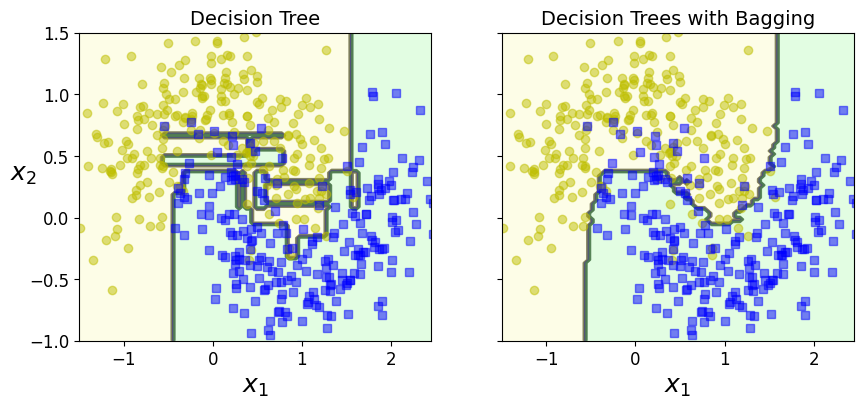

In [23]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

**Task 4c**  
Based only on the decision boundary plots above, which model is more likely to  <br>
be overfit: bagging ensemble classifier or decision tree classifier.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 4c) answer:

Clearly the Decision Tree is more pro to overfit since its boundaries are more detailed and generalize worse.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

## Feature importance

Let's use the [mnist](https://www.openml.org/d/554) dataset. It contains 60k handwritten digits <br>
for training and 10k for testing. Here we're going to examine what features <br>
of a handwritten character a random forest identifies as important.

In [24]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

### Task 5: Feature Importance

**Task 5a)**  
Initialize a random forest classifier with 100 estimators. <br>
Fit it to mnist["data"] and mnist["target"]

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [25]:
rand_forest_clf = RandomForestClassifier(n_estimators=100)
# fit
rand_forest_clf.fit(X=mnist['data'],y=mnist['target'])

RandomForestClassifier()

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

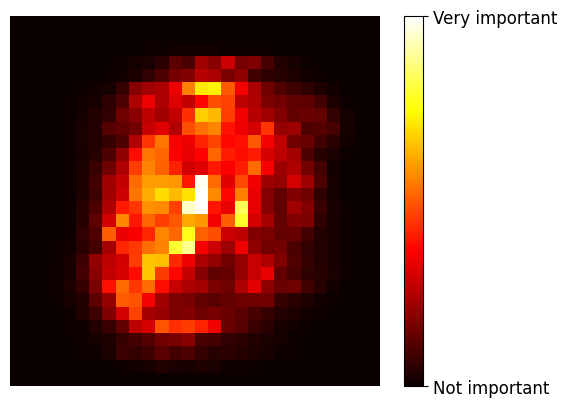

In [26]:
plot_digit(rand_forest_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rand_forest_clf.feature_importances_.min(), rand_forest_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

**Task 5b)**  
What can you infer about the model and dataset from the visualization above?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 5b) answer:

This is very interesting. It shows that the center pixels are the most important when classifying digits. Other important pixels are the north center area and the south west of the center area. As expected, the least important parts are the outermost pixels.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

# AdaBoost

AdaBoost is an approach that entails training a classifier on a dataset, <br>
evaluating which datapoints it struggles with, then **trains copies of the** <br>
**classifier with the events reweighted** such that data points it struggles with <br>
are given higher priority during training. Importantly, **each individual** <br>
**classifier is likely to perform worse** on validation/test data than the original <br>
but the **ensemble of the original and copies are likely to perform better**.

### Task 6: AdaBoost
Now, initialize an [AdaBoost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) for a decision tree classifier with the <br>
following parameters:   
- max_depth = 1 - Decision Tree classifier parameter
- n_estimators = 200 - Ada Boost classifier parameter
- learning_rate = 0.5 - Ada Boost classifier parameter
- algorithm = "SAMME" - Ada Boost classifier parameter
- random_state = 42 - Ada Boost classifier parameter

Fit it to the training data.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,learning_rate=0.5,algorithm='SAMME',random_state=42)
#fit
ada_clf.fit(X_train,y_train)

/Users/juanpablosalas/Documents/PH 551-001 Machine Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

Plot the decision boundary for ada_clf, X, y

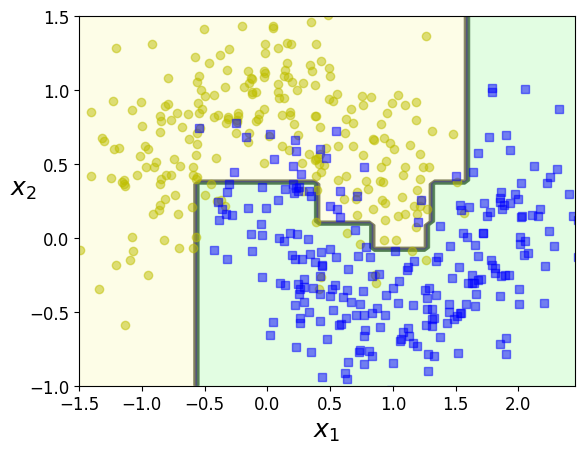

In [28]:
plot_decision_boundary(ada_clf, X, y)

**Don't worry about understanding the following code. The important thing is to** <br>
**understand the plots**.

The following is essentially implementing the AdaBoost procedure from scratch <br>
for a support vector classifier (SVC).

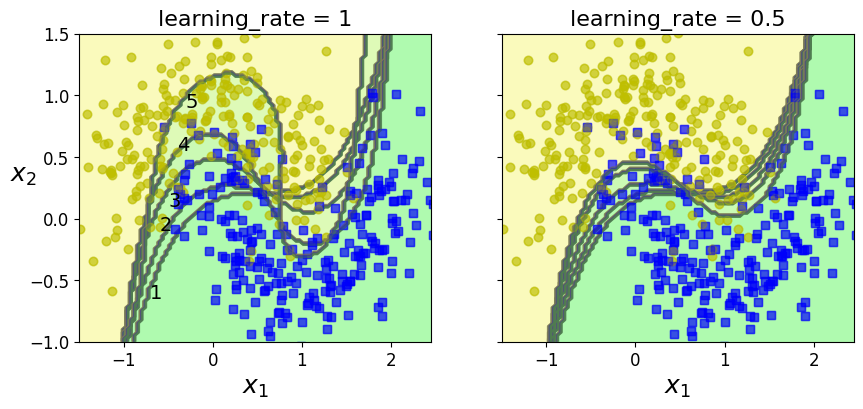

In [29]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

The properties of this form of ensemble classifier look like the following.

In [30]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['classes_',
 'estimator_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_',
 'n_features_in_']

# Gradient Boosting

Gradient boosting is a technique whereby we build an ensemble of models where <br>
subsequent models try to slightly correct the errors of previous models.

In [31]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

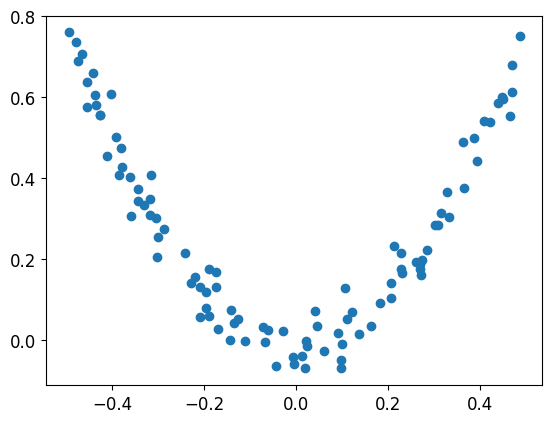

In [32]:
plt.scatter(X, y)

### Task 7: Gradient Boosting

**Task 7a)**  
In this task, we will be doing the following.  <br>
1. Initialize a decision tree regressor with `max_depth=2` and <br> `random_state=42`.
2. Fit it to X and y.
3. Substract the predicted y from the y values you fitted to in previous step.
4. Fit the new classifier with the output values from the previous step.
5. Repeat steps 3 and 4 one more time. You should obtain values for y2 and y3.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state=42)
# fit
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [34]:
y2 = y-tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2,random_state=42)
#fit to X and y2
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [35]:
y3 = y2-tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2,random_state=42)
#fit to X and y3
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

In [37]:
X_new = np.array([[0.8]])

The new predicted `y` should be the sum of the predictions for the `X_new` <br> performed by each tree.

In [38]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [39]:
y_pred

array([0.75026781])

**Task 7b)**  
What do plots below show?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 7b) answer:

The left column plots show the decision tree regressors on the original training set and on the subsequent residuals. The right column plots show the boosted trees that combine the original predictions and the residual predictions to obtain a more accurate prediction. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

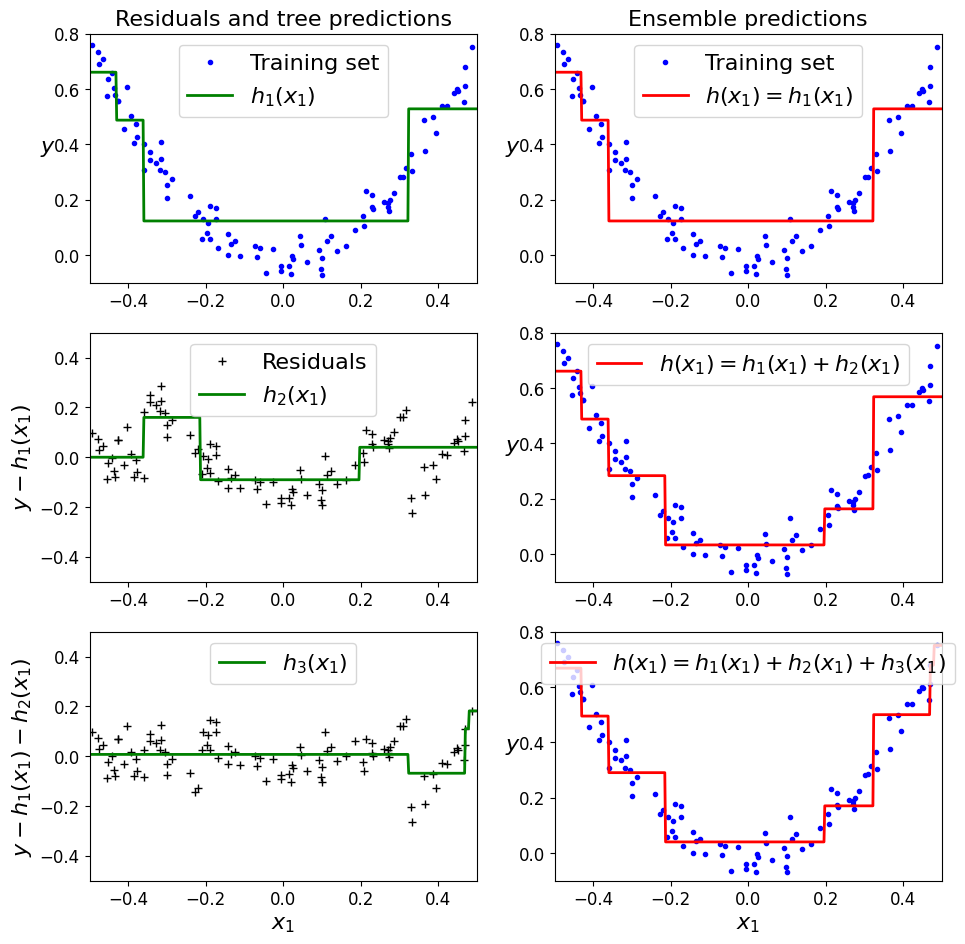

In [40]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

**Task 7c)**  
We are also going to compare two gradient boosting regressor objects. <br>
Both with `max_depth=2` and `random_state=42`, but one will be 'fast' and one <br>
will be 'slow'. <br>
For the fast one, set the learning rate to 1 and number of estimators to 3. <br>
For the slow one, set the learning rate to 0.1 and number of estimators to 200.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_fast = GradientBoostingRegressor(max_depth=2,random_state=42,learning_rate=1,n_estimators=3)
gbrt_slow = GradientBoostingRegressor(max_depth=2,random_state=42,learning_rate=0.1,n_estimators=200)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

Next, we are fitting them to the data.

In [42]:
gbrt_fast.fit(X, y)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

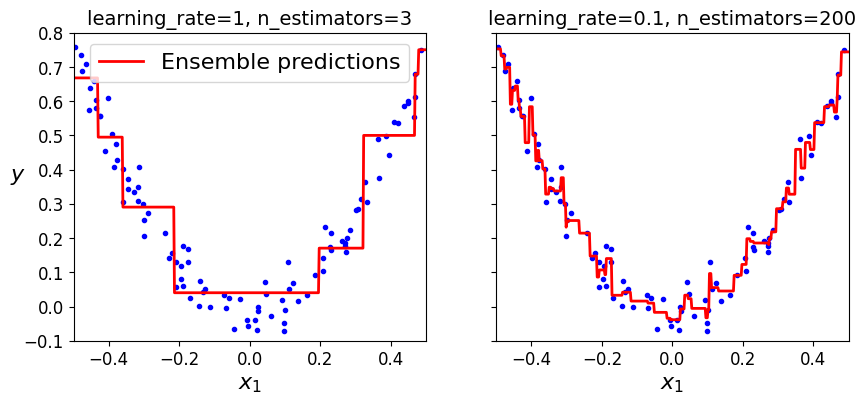

In [43]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt_fast], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
                 label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_fast.learning_rate,
                                                     gbrt_fast.n_estimators),
          fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate,
                                                     gbrt_slow.n_estimators),
          fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

## Gradient Boosting with Early stopping

In this section, we are going to be looking for the lowest MSE in a set of <br> boosted trees. Just run the cells below and discuss the results with your group.

**Again, the important thing here is to understand the plots. Don't worry about** <br>
**trying to understand all of the code**.

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=4, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=np.int64(56),
                          random_state=42)

In [45]:
min_error = np.min(errors)

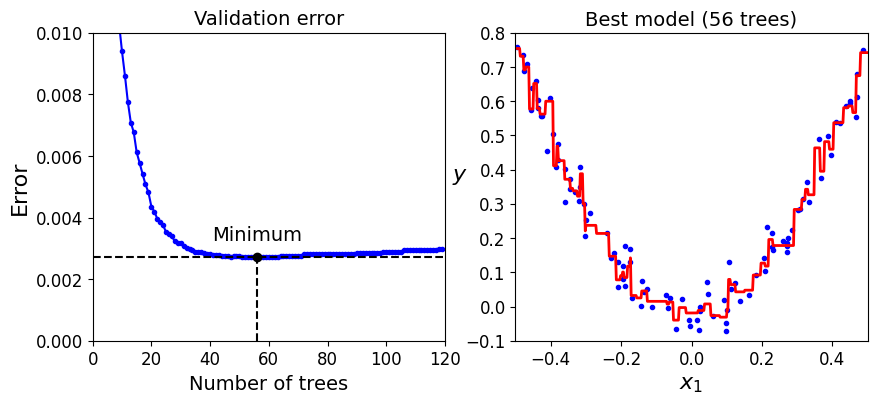

In [46]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [47]:
gbrt = GradientBoostingRegressor(max_depth=4, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [48]:
print(gbrt.n_estimators)

31


In [49]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.0030785999080668665


## Using XGBoost

### Task 8
Finally, we move to an [XGBoost](https://xgboost.readthedocs.io/en/stable/) regressor - arguably one of the most popular and <br>
widely-used algorithms nowadays. **At low depths and low estimators**, XGBoost <br>
can actually perform **worse than a normal gradient-boosted tree** because of <br>
the way the data is binned into histograms by the model **but can scale better** <br>
than a standard gradient-boosted tree allowing for overall better results.

First, make sure you have it installed.

In [52]:
!pip install xgboost


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [53]:
import xgboost

In [54]:
xgb_reg = xgboost.XGBRegressor(n_estimators=100, max_depth=2, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred) # Not shown
print("Validation MSE:", val_error)           # Not shown


Validation MSE: 0.003860706105008133


**Task 8**  
Do the same thing as above but while fitting, add a validation sets and set <br>
`early_stopping_rounds=2`. To do that, you want to add the `eval_set` parameter <br>
and set `[(X_val, y_val)]` value there.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [57]:
val_errors_with_stop = []
xgb_reg = xgboost.XGBRegressor(n_estimators=100,max_depth=2,random_state=42,early_stopping_rounds=2)
# add the validation set and an early stopping, fit
xgb_reg.fit(X_train,y_train,eval_set=[(X_val,y_val)])
val_errors_with_stop = xgb_reg.evals_result()['validation_0']['rmse']
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)  # Not shown
print("Validation MSE:", val_error)            # Not shown

[0]	validation_0-rmse:0.16431
[1]	validation_0-rmse:0.12752
[2]	validation_0-rmse:0.10129
[3]	validation_0-rmse:0.08966
[4]	validation_0-rmse:0.07659
[5]	validation_0-rmse:0.06950
[6]	validation_0-rmse:0.06822
[7]	validation_0-rmse:0.06925
[8]	validation_0-rmse:0.06551
[9]	validation_0-rmse:0.06206
[10]	validation_0-rmse:0.06053
[11]	validation_0-rmse:0.06227
Validation MSE: 0.003664239897742551


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this